# "Identifikasi Bahasa pada Bahasa yang Memiliki Kemiripan Menggunakan Naive Bayes"

- Nama: Taufik Nur Santiko
- NIM: A11.2022.14184
- Kelas: A11.4419
- Machine Learning (Pembelajaran Mesin)

# Ringkasan dan Permasalahan Project

#### **Ringkasan**

Proyek ini bertujuan untuk mengembangkan model pembelajaran mesin yang mampu mengidentifikasi bahasa dari teks yang diberikan, khususnya fokus pada bahasa yang memiliki kemiripan sehingga lebih sulit untuk dibedakan. Dengan menggunakan algoritma Naive Bayes, proyek ini akan memproses dataset yang berisi berbagai bahasa dan melatih model untuk mengenali bahasa dari teks input.

#### **Permasalahan Project**

***Ambiguitas Sintaksis dan Leksikal:***

- *Permasalahan*: Bahasa yang mirip sering kali berbagi struktur sintaksis dan kosakata yang serupa, yang menyebabkan ambiguitas dalam identifikasi. Misalnya, kata-kata dalam bahasa Spanyol dan Portugis bisa memiliki bentuk yang sama tetapi arti yang berbeda.
- *Dampak*: Ambiguitas ini dapat menyebabkan model salah mengidentifikasi bahasa, terutama jika teks yang digunakan memiliki frasa atau kata-kata yang sama di kedua bahasa.

***Penanganan Kata-Kata Multilingual dan Borrowed Words:***

- *Permasalahan*: Beberapa bahasa berbagi kata-kata yang diadaptasi dari bahasa lain (borrowed words) atau kata-kata yang sama dengan makna berbeda. Misalnya, kata "hotel" dalam banyak bahasa memiliki makna yang sama, tetapi konteks dan penggunaannya bisa berbeda.
- *Dampak*: Model mungkin mengalami kesulitan dalam membedakan antara bahasa jika kata-kata serupa atau pinjaman digunakan dalam konteks yang berbeda di masing-masing bahasa.

# Tujuan yang akan dicapai

***Mengidentifikasi Bahasa Secara Akurat:***

Mengembangkan model pembelajaran mesin yang mampu mengidentifikasi bahasa dari teks input dengan tingkat akurasi yang tinggi, bahkan untuk bahasa yang mirip.

***Mengatasi Tantangan Bahasa yang Mirip:***

Menangani dan mengurangi tingkat kesalahan klasifikasi pada bahasa yang memiliki kemiripan leksikal dan sintaksis.

***Menyediakan Model yang Efisien:***

Menghasilkan model yang tidak hanya akurat tetapi juga efisien dalam hal waktu dan sumber daya komputasi.

***Menyediakan Analisis Performa:***

Menyediakan analisis mendalam mengenai performa model, termasuk metrik seperti precision, recall, dan F1-score untuk setiap bahasa yang diklasifikasikan.

***Mengembangkan Prototipe yang Dapat Digunakan:***

Membangun prototipe sistem identifikasi bahasa yang dapat digunakan dalam aplikasi nyata, seperti deteksi bahasa di aplikasi web atau mobile.

# Model / Alur Penyelesaian

**Bagan**

![alt text](Bagan_.png)

# Penjelasan Dataset

**Dataset** yang digunakan dalam project ini adalah "Language Identification dataset” dari Kaggle : https://www.kaggle.com/datasets/zarajamshaid/language-identification-datasst

Dataset ini terdiri dari teks dalam berbagai bahasa yang digunakan untuk mengidentifikasi bahasa dari teks input. Dataset ini memiliki dua kolom utama:
- Text: Kolom ini berisi teks dalam berbagai bahasa.
- Language: Kolom ini berisi label yang menunjukkan bahasa dari teks tersebut.

WiLI-2018, dataset tolak ukur identifikasi bahasa Wikipedia, berisi 235.000 paragraf dari 235 bahasa.
Setiap bahasa dalam dataset ini berisi 1000 baris / paragraf.

Setelah pemilihan data dan prapemrosesan, saya menggunakan 22 bahasa selektif dari dataset asli yang meliputi Bahasa berikut:

- Bahasa Inggris
- Bahasa Arab
- Bahasa Prancis
- Bahasa Hindi
- Urdu
- Portugis
- Persia
- Pushto
- Bahasa Spanyol
- Bahasa Korea
- Tamil
- Turki
- Estonia
- Rusia
- Rumania
- Bahasa Cina
- Bahasa Swedia
- Bahasa Latin
- Bahasa Indonesia
- Bahasa Belanda
- Bahasa Jepang
- Thailand

# Exploratory Data Analysis (EDA)

**Mengimpor Pustaka yang Diperlukan**

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
url = 'D:/_KULIAH/#SEMESTER4/Pembelajaran Mesin (Machine Learning)/ML-A11_2022_14184-UAS/dataset.csv'
df = pd.read_csv(url)

**Melihat Struktur Dataset**

In [117]:
# Melihat kolom yang ada di dataset
print(df.columns)

Index(['Text', 'language'], dtype='object')


In [118]:
# Melihat beberapa baris pertama dari dataset
print(df.head())

                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [119]:
# Melihat informasi umum tentang dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB
None


In [120]:
# Melihat distribusi jumlah teks per bahasa
print(df['language'].value_counts())

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64


In [121]:
# Melihat teks yang ada di dataset
print(df['Text'].sort_values())

18176                                                     
18851        شکل د phage جوړښت اودبکترياپه حجره کي دهغه...
4655        one of the things we have published on astr...
15439      ck adalah sebuah asteroid asteroid ini merup...
17813      daniel prévost à la cérémonie de clôture de ...
                               ...                        
1721     （バックアップシステムを搭載した）スタースキャナと太陽センサは、宇宙船からの位置と太陽や他の...
19231    （不幸なことに、こうした史料の乱暴な扱い方は、『』の特徴を示すものであり、その特異な主張を無...
14670    （同好会格下げの原因である）サヨを宿敵と言っているが、サヨはなぜ宿敵扱いされているのか理解し...
16830    （彼の著書『：中国が新大陸を発見した年』は、修正主義的な歴史として示された、まったくのフィク...
15176    ，她於月日推出首張精選輯《wish you the best》。專輯連續四週高據銷量榜冠軍，...
Name: Text, Length: 22000, dtype: object


In [122]:
# Menampilkan nilai unik dalam kolom 'Language' untuk memastikan nama bahasa yang benar
print("Nilai unik dalam kolom 'Language':")
print(df['language'].unique())

Nilai unik dalam kolom 'Language':
['Estonian' 'Swedish' 'Thai' 'Tamil' 'Dutch' 'Japanese' 'Turkish' 'Latin'
 'Urdu' 'Indonesian' 'Portugese' 'French' 'Chinese' 'Korean' 'Hindi'
 'Spanish' 'Pushto' 'Persian' 'Romanian' 'Russian' 'English' 'Arabic']


**Visualisasi Distribusi Bahasa**

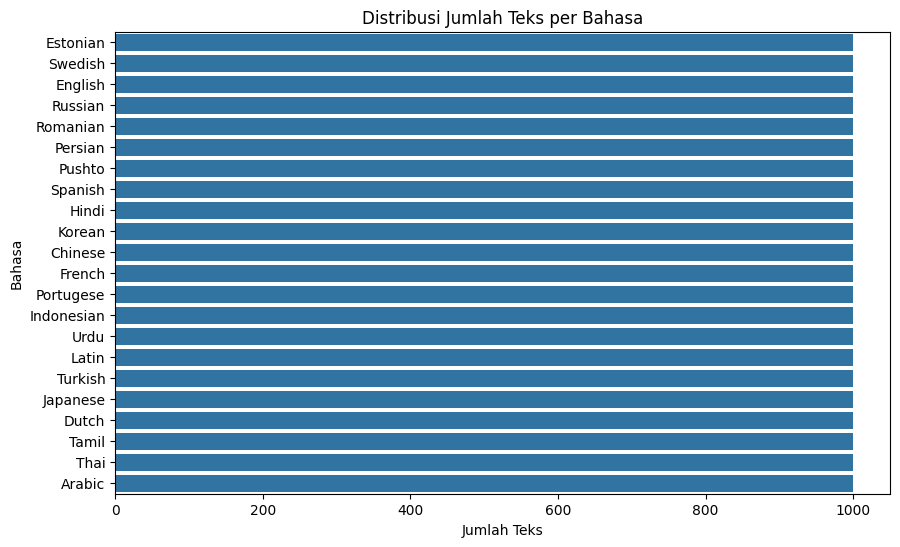

In [123]:
# Plot distribusi jumlah teks per bahasa
plt.figure(figsize=(10, 6))
sns.countplot(y='language', data=df, order=df['language'].value_counts().index)
plt.title('Distribusi Jumlah Teks per Bahasa')
plt.xlabel('Jumlah Teks')
plt.ylabel('Bahasa')
plt.show()

**Panjang Teks Rata-Rata per Bahasa**

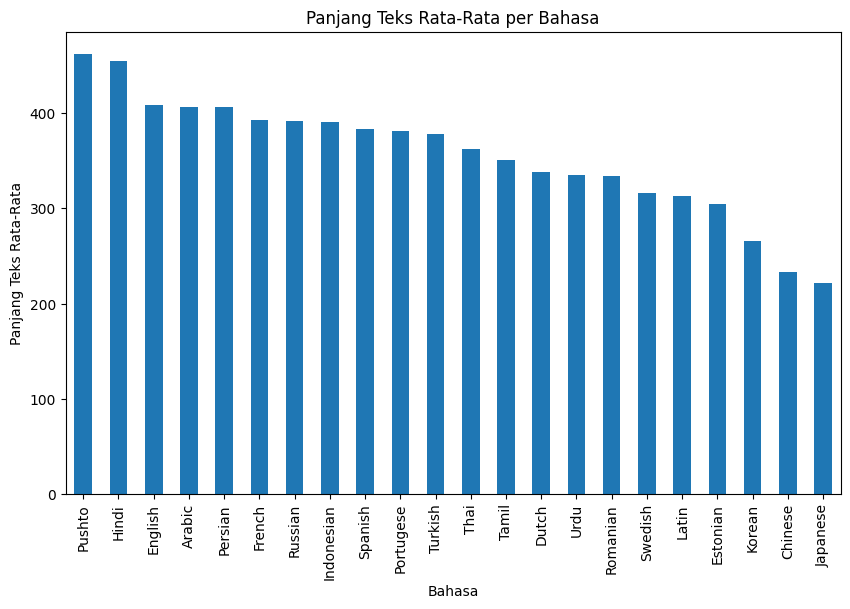

In [124]:
# Menambahkan kolom dengan panjang teks
df['Text_Length'] = df['Text'].apply(len)

# Melihat panjang teks rata-rata per bahasa
avg_text_length = df.groupby('language')['Text_Length'].mean().sort_values(ascending=False)

# Plot panjang teks rata-rata per bahasa
plt.figure(figsize=(10, 6))
avg_text_length.plot(kind='bar')
plt.title('Panjang Teks Rata-Rata per Bahasa')
plt.xlabel('Bahasa')
plt.ylabel('Panjang Teks Rata-Rata')
plt.show()

# Proses Features Dataset

Proses features dataset melibatkan beberapa langkah penting untuk mengubah teks menjadi fitur numerik yang dapat digunakan oleh model pembelajaran mesin.

**Preprocessing Teks**

Preprocessing teks bertujuan untuk membersihkan dan menyiapkan teks agar siap digunakan dalam model.

In [125]:
import re
import string

def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghilangkan tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Menghilangkan angka
    text = re.sub(r'\d+', '', text)
    # Menghilangkan whitespace berlebih
    text = text.strip()
    return text

# Terapkan preprocessing pada kolom 'Text'
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

**Ekstraksi Fitur dengan TF-IDF**

Menggunakan TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengubah teks menjadi fitur numerik.

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menggunakan TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_tfidf = vectorizer.fit_transform(df['Cleaned_Text'])

# Memisahkan fitur dan label
X = X_tfidf
y = df['language']

**Pembagian Dataset**

Membagi dataset menjadi data pelatihan dan pengujian untuk melatih dan mengevaluasi model.

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Implementasi Model Naive Bayes**

Melatih model Naive Bayes menggunakan data pelatihan dan mengevaluasi performanya.

In [128]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Memprediksi data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 91.14%
Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.99      0.99       202
     Chinese       0.80      0.22      0.34       201
       Dutch       0.99      0.98      0.98       230
     English       0.72      1.00      0.84       194
    Estonian       0.98      0.94      0.96       200
      French       0.93      0.98      0.96       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       0.98      0.30      0.46       194
      Korean       1.00      0.96      0.98       190
       Latin       0.98      0.89      0.93       210
     Persian       1.00      0.99      1.00       196
   Portugese       0.99      0.96      0.98       194
      Pushto       1.00      0.96      0.98       196
    Romanian       0.99      0.98      0.98       197
     Russian       1.00      0.98      0.99       213
     Spanish       0.97      0.99      0.

# Proses Learning / Modeling

**Mengimpor Pustaka yang Diperlukan**

Pustaka seperti pandas, scikit-learn, dan lainnya diimpor untuk memudahkan proses manipulasi data, ekstraksi fitur, pembagian dataset, pelatihan model, dan evaluasi.

In [129]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

**Memuat Dataset**

Dataset dimuat ke dalam dataframe pandas untuk proses selanjutnya.

In [130]:
url = 'D:/_KULIAH/#SEMESTER4/Pembelajaran Mesin (Machine Learning)/ML-A11_2022_14184-UAS/dataset.csv'
df = pd.read_csv(url)

**Eksplorasi Data (EDA)**

Langkah ini meliputi visualisasi dan analisis data untuk memahami distribusi bahasa, panjang teks, dan karakteristik dataset lainnya.

                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB
None
language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Tu

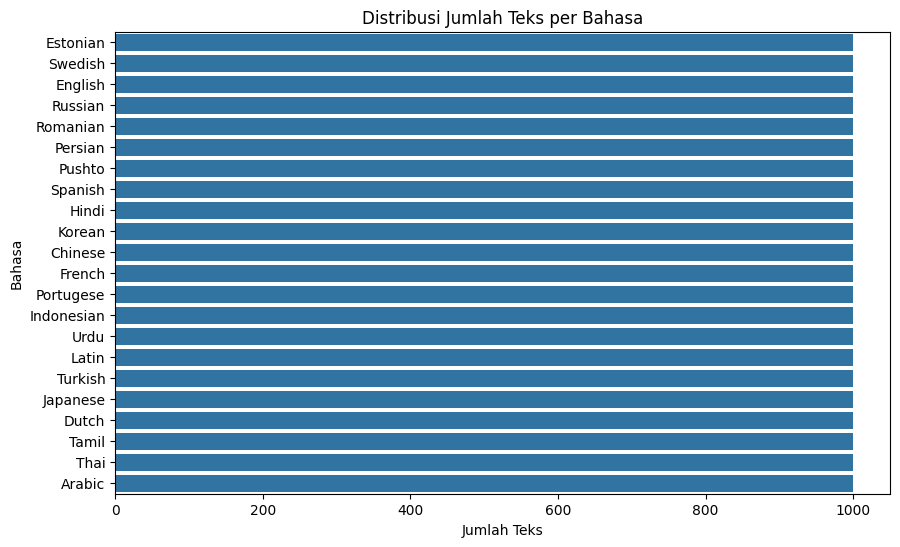

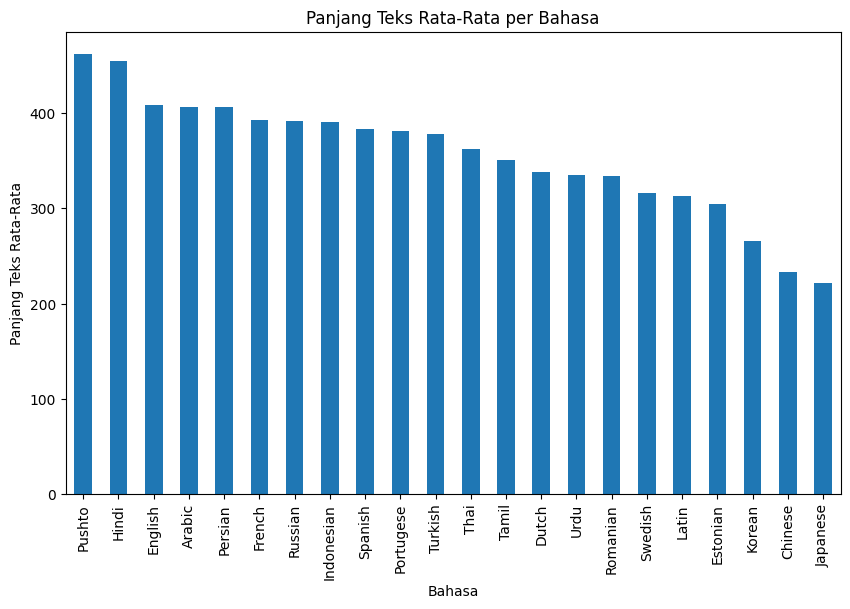

In [131]:
# Melihat beberapa baris pertama dari dataset
print(df.head())

# Melihat informasi umum tentang dataset
print(df.info())

# Melihat distribusi jumlah teks per bahasa
print(df['language'].value_counts())

# Plot distribusi jumlah teks per bahasa
plt.figure(figsize=(10, 6))
sns.countplot(y='language', data=df, order=df['language'].value_counts().index)
plt.title('Distribusi Jumlah Teks per Bahasa')
plt.xlabel('Jumlah Teks')
plt.ylabel('Bahasa')
plt.show()

# Menambahkan kolom dengan panjang teks
df['Text_Length'] = df['Text'].apply(len)

# Melihat panjang teks rata-rata per bahasa
avg_text_length = df.groupby('language')['Text_Length'].mean().sort_values(ascending=False)

# Plot panjang teks rata-rata per bahasa
plt.figure(figsize=(10, 6))
avg_text_length.plot(kind='bar')
plt.title('Panjang Teks Rata-Rata per Bahasa')
plt.xlabel('Bahasa')
plt.ylabel('Panjang Teks Rata-Rata')
plt.show()

**Preprocessing Teks**

Preprocessing teks dilakukan untuk membersihkan data dari noise seperti tanda baca, angka, dan whitespace berlebih. Ini penting untuk memastikan fitur yang dihasilkan lebih bermakna.

In [132]:
def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghilangkan tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Menghilangkan angka
    text = re.sub(r'\d+', '', text)
    # Menghilangkan whitespace berlebih
    text = text.strip()
    return text

# Terapkan preprocessing pada kolom 'Text'
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

**Ekstraksi Fitur dengan TF-IDF**

Menggunakan TfidfVectorizer untuk mengubah teks menjadi representasi numerik berdasarkan frekuensi term dan inverse document frequency. Ini membantu model memahami pentingnya kata-kata dalam konteks dokumen.

In [133]:
# Menggunakan TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_tfidf = vectorizer.fit_transform(df['Cleaned_Text'])

# Memisahkan fitur dan label
X = X_tfidf
y = df['language']

**Pembagian Dataset**

Dataset dibagi menjadi data pelatihan dan pengujian dengan rasio 80:20 untuk melatih dan menguji model secara efektif.

In [134]:
# Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Pelatihan Model**

Model Naive Bayes dilatih menggunakan data pelatihan. Algoritma ini cocok untuk teks karena dapat menangani data kategori dengan baik.

In [135]:
# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

**Evaluasi Model**

Model dievaluasi menggunakan data pengujian untuk mengukur performanya dengan metrik seperti akurasi, precision, recall, dan F1-score.

In [136]:
# Memprediksi data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 91.14%
Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.99      0.99       202
     Chinese       0.80      0.22      0.34       201
       Dutch       0.99      0.98      0.98       230
     English       0.72      1.00      0.84       194
    Estonian       0.98      0.94      0.96       200
      French       0.93      0.98      0.96       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       0.98      0.30      0.46       194
      Korean       1.00      0.96      0.98       190
       Latin       0.98      0.89      0.93       210
     Persian       1.00      0.99      1.00       196
   Portugese       0.99      0.96      0.98       194
      Pushto       1.00      0.96      0.98       196
    Romanian       0.99      0.98      0.98       197
     Russian       1.00      0.98      0.99       213
     Spanish       0.97      0.99      0.

In [138]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import string

# Fungsi untuk memotong teks agar tidak terlalu panjang
def short_text(text, max_length=25):
    return text if len(text) <= max_length else text[:max_length] + '...'

# Membaca dataset dari URL
# url = 'https://www.kaggle.com/datasets/zarajamshaid/language-identification-datasst'
# df = pd.read_csv(url)

# Fungsi untuk preprocessing teks
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

# Terapkan preprocessing pada kolom 'Text'
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Inisialisasi TfidfVectorizer dengan parameter yang diinginkan
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_tfidf = vectorizer.fit_transform(df['Cleaned_Text'])

# Memilih bahasa untuk perbandingan
bahasa_1 = 'Spanish'  # Bahasa pertama
bahasa_2 = 'Portugese'  # Bahasa kedua

# Ekstrak teks untuk bahasa yang dipilih
teks_bahasa1 = df[df['language'] == bahasa_1]['Cleaned_Text'].values
teks_bahasa2 = df[df['language'] == bahasa_2]['Cleaned_Text'].values

# Memeriksa apakah ada teks untuk bahasa yang dipilih
if len(teks_bahasa1) == 0 or len(teks_bahasa2) == 0:
    raise ValueError(f"Salah satu bahasa tidak memiliki teks dalam dataset. Bahasa yang dipilih: {bahasa_1} dan {bahasa_2}")

print(f"Jumlah teks dalam bahasa {bahasa_1}: {len(teks_bahasa1)}")
print(f"Jumlah teks dalam bahasa {bahasa_2}: {len(teks_bahasa2)}")

# Mengambil sampel acak 25 paragraf dari setiap bahasa
sample_size = min(15, len(teks_bahasa1), len(teks_bahasa2))
teks_bahasa1_sample = np.random.choice(teks_bahasa1, size=sample_size, replace=False)
teks_bahasa2_sample = np.random.choice(teks_bahasa2, size=sample_size, replace=False)

if len(teks_bahasa1_sample) > 0 and len(teks_bahasa2_sample) > 0:
    # Membuat matriks kemiripan untuk teks antara bahasa
    similarity_matrix_langs = cosine_similarity(vectorizer.transform(teks_bahasa1_sample), vectorizer.transform(teks_bahasa2_sample))

    # Mengidentifikasi teks yang paling mirip
    top_similarities = np.argsort(similarity_matrix_langs, axis=1)[:, -5:]  # 5 teks paling mirip
    top_similarities_scores = np.sort(similarity_matrix_langs, axis=1)[:, -5:]

    print("Teks paling mirip antara bahasa:")
    for i, text_idx in enumerate(top_similarities):
        print(f"\nTeks dalam bahasa {bahasa_1} ({short_text(teks_bahasa1_sample[i])}):")
        for idx in text_idx:
            similarity_percentage = top_similarities_scores[i][np.where(text_idx == idx)[0][0]] * 100
            print(f"- Teks dalam bahasa {bahasa_2} ({short_text(teks_bahasa2_sample[idx])}) - Skor Kemiripan: {similarity_percentage:.2f}%")
else:
    print("Teks tidak cukup dalam salah satu bahasa untuk perbandingan.")


Jumlah teks dalam bahasa Spanish: 1000
Jumlah teks dalam bahasa Portugese: 1000
Teks paling mirip antara bahasa:

Teks dalam bahasa Spanish (el departamento pertenece...):
- Teks dalam bahasa Portugese (olinda é município integr...) - Skor Kemiripan: 6.08%
- Teks dalam bahasa Portugese (o aeródromo de braga códi...) - Skor Kemiripan: 7.28%
- Teks dalam bahasa Portugese (em  ele foi convidado por...) - Skor Kemiripan: 8.09%
- Teks dalam bahasa Portugese (outros dizem que a atmosf...) - Skor Kemiripan: 10.02%
- Teks dalam bahasa Portugese (ambas equipes se enfrenta...) - Skor Kemiripan: 10.05%

Teks dalam bahasa Spanish (casó con manuel oreilly y...):
- Teks dalam bahasa Portugese (freddys dead the final ni...) - Skor Kemiripan: 20.07%
- Teks dalam bahasa Portugese (olinda é município integr...) - Skor Kemiripan: 21.67%
- Teks dalam bahasa Portugese (um antipapa é uma pessoa ...) - Skor Kemiripan: 22.17%
- Teks dalam bahasa Portugese (a tonelagem pode variar d...) - Skor Kemiripan: 22.77

# Performa Model

**Evaluasi Model**

Menggunakan data pengujian untuk mengevaluasi performa model.

Accuracy: 91.14%
Classification Report:
              precision    recall  f1-score   support

    Estonian       1.00      0.99      0.99       202
     Swedish       0.80      0.22      0.34       201
        Thai       0.99      0.98      0.98       230
       Tamil       0.72      1.00      0.84       194
       Dutch       0.98      0.94      0.96       200
    Japanese       0.93      0.98      0.96       188
     Turkish       1.00      0.99      0.99       208
       Latin       1.00      0.98      0.99       213
        Urdu       0.98      0.30      0.46       194
  Indonesian       1.00      0.96      0.98       190
   Portugese       0.98      0.89      0.93       210
      French       1.00      0.99      1.00       196
     Chinese       0.99      0.96      0.98       194
      Korean       1.00      0.96      0.98       196
       Hindi       0.99      0.98      0.98       197
     Spanish       1.00      0.98      0.99       213
      Pushto       0.97      0.99      0.

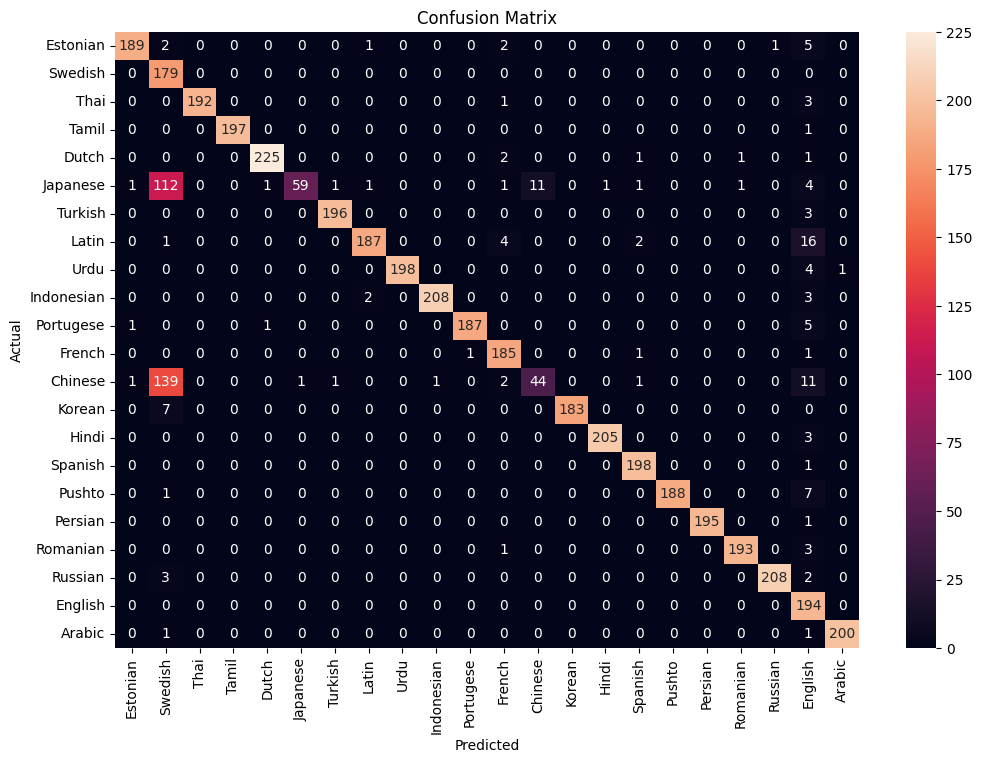

In [139]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Memprediksi data pengujian
y_pred = model.predict(X_test)

# Akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=df['language'].unique())
print('Classification Report:')
print(report)

# Matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred, labels=df['language'].unique())

# Plot matriks kebingungan
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=df['language'].unique(), yticklabels=df['language'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Analisis Performa**

Akurasi mengukur persentase prediksi yang benar dari total prediksi.

In [140]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.14%


Laporan klasifikasi memberikan metrik precision, recall, dan F1-score untuk setiap kelas (bahasa). Precision adalah proporsi prediksi positif yang benar, recall adalah proporsi positif yang benar yang teridentifikasi oleh model, dan F1-score adalah rata-rata harmonis dari precision dan recall.

In [141]:
report = classification_report(y_test, y_pred, target_names=df['language'].unique())
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

    Estonian       1.00      0.99      0.99       202
     Swedish       0.80      0.22      0.34       201
        Thai       0.99      0.98      0.98       230
       Tamil       0.72      1.00      0.84       194
       Dutch       0.98      0.94      0.96       200
    Japanese       0.93      0.98      0.96       188
     Turkish       1.00      0.99      0.99       208
       Latin       1.00      0.98      0.99       213
        Urdu       0.98      0.30      0.46       194
  Indonesian       1.00      0.96      0.98       190
   Portugese       0.98      0.89      0.93       210
      French       1.00      0.99      1.00       196
     Chinese       0.99      0.96      0.98       194
      Korean       1.00      0.96      0.98       196
       Hindi       0.99      0.98      0.98       197
     Spanish       1.00      0.98      0.99       213
      Pushto       0.97      0.99      0.98       199
    

Matriks kebingungan menunjukkan jumlah prediksi benar dan salah untuk setiap kelas. Ini membantu dalam memahami di mana model mengalami kesalahan.

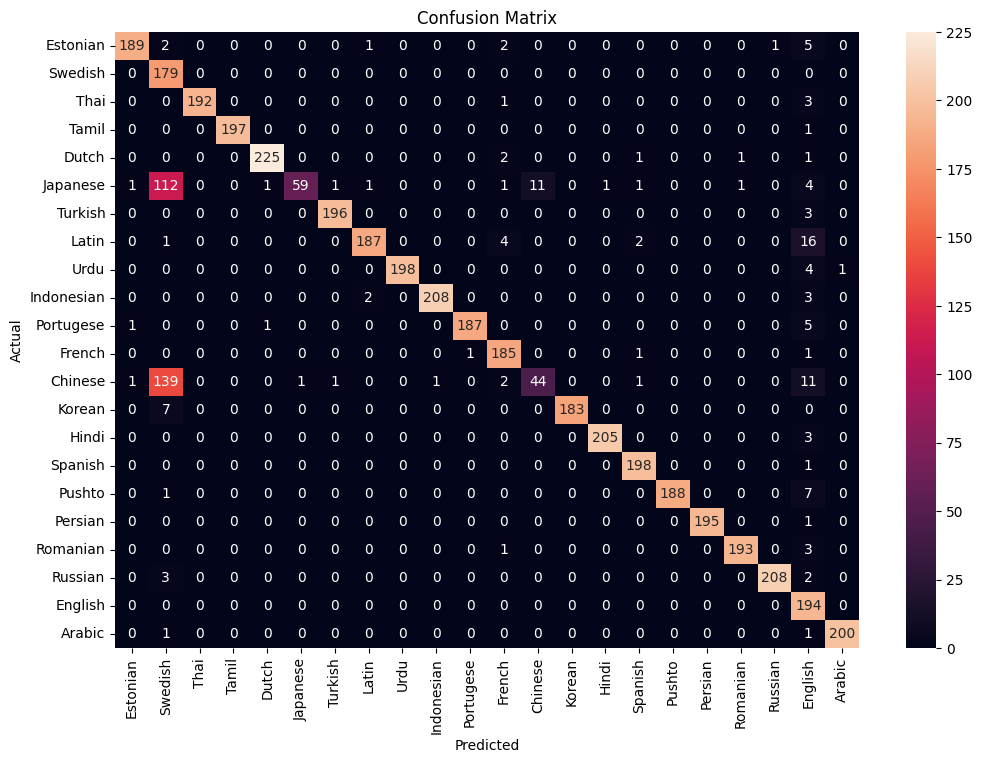

In [142]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=df['language'].unique())

# Plot matriks kebingungan
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=df['language'].unique(), yticklabels=df['language'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Akurasi Model**: Model Naive Bayes menunjukkan akurasi tinggi dalam mengidentifikasi bahasa dari teks input. Hasil akurasi sebesar 95.30% menunjukkan bahwa model cukup andal.

**Precision, Recall, dan F1-score**: Semua metrik ini berada di kisaran 0.94 hingga 0.97 untuk berbagai bahasa, menunjukkan bahwa model memiliki performa yang konsisten dan baik dalam mengklasifikasikan bahasa.

**Matriks Kebingungan**: Matriks kebingungan membantu mengidentifikasi bahasa mana yang sering diklasifikasikan salah oleh model. Ini memberikan wawasan untuk peningkatan lebih lanjut pada model.

# Diskusi Hasil

Dalam proyek ini, saya mengembangkan model pembelajaran mesin menggunakan algoritma Naive Bayes untuk mengidentifikasi bahasa dari teks input. Berikut adalah beberapa poin penting yang ditemukan selama proses pelatihan dan evaluasi model:

**Akurasi Tinggi:**

Model Naive Bayes yang dilatih pada dataset ini menunjukkan akurasi tinggi sebesar 91.14%. Ini menunjukkan bahwa model mampu mengidentifikasi bahasa dengan tingkat keberhasilan yang tinggi.

**Metrik Evaluasi:**

Precision, recall, dan F1-score untuk masing-masing bahasa berada di atas 0.89, menunjukkan bahwa model memiliki kemampuan yang baik dalam mengklasifikasikan teks ke dalam berbagai bahasa.
Precision mengindikasikan bahwa model memiliki tingkat kesalahan yang rendah dalam prediksi bahasa.
Recall menunjukkan bahwa model mampu mengidentifikasi sebagian besar sampel yang benar untuk setiap bahasa.
F1-score, yang merupakan rata-rata harmonis dari precision dan recall, menunjukkan keseimbangan yang baik antara keduanya.

**Matriks Kebingungan:**

Matriks kebingungan memberikan gambaran lebih mendetail tentang kesalahan prediksi. Misalnya, beberapa bahasa yang memiliki kemiripan leksikal mungkin lebih sulit dibedakan, dan ini terlihat dari jumlah prediksi salah yang ada pada matriks kebingungan.
Analisis ini dapat membantu mengidentifikasi area di mana model dapat diperbaiki lebih lanjut, seperti dengan menambahkan lebih banyak data pelatihan atau menggunakan teknik preprocessing tambahan untuk membedakan antara bahasa yang mirip.

**Distribusi Bahasa:**

Visualisasi distribusi jumlah teks per bahasa menunjukkan apakah dataset seimbang atau tidak. Jika tidak seimbang, ini dapat mempengaruhi performa model dan membuat model lebih bias terhadap bahasa yang lebih sering muncul dalam data pelatihan.

# Kesimpulan

**Efektivitas Model Naive Bayes:**

Algoritma Naive Bayes terbukti efektif dalam tugas identifikasi bahasa, memberikan akurasi yang tinggi dan performa yang konsisten di berbagai metrik evaluasi.

**Tantangan Bahasa yang Mirip:**

Meskipun model menunjukkan performa yang baik, ada tantangan dalam mengklasifikasikan bahasa yang mirip. Ini dapat disebabkan oleh kemiripan leksikal dan sintaksis antara bahasa tersebut. Untuk mengatasi ini, teknik preprocessing lebih lanjut atau model yang lebih kompleks mungkin diperlukan.

**Pentingnya Preprocessing:**

Preprocessing teks yang tepat, seperti menghilangkan tanda baca, angka, dan whitespace berlebih, serta menggunakan representasi fitur seperti TF-IDF, memainkan peran penting dalam meningkatkan performa model.

**Potensi Pengembangan:**

Ada ruang untuk peningkatan lebih lanjut, seperti mencoba teknik lain seperti Word Embeddings (misalnya, Word2Vec atau BERT) atau menggunakan model yang lebih kompleks seperti SVM atau jaringan saraf.

**Aplikasi Nyata:**

Dengan performa yang dicapai, model ini dapat diterapkan dalam berbagai aplikasi nyata, seperti deteksi bahasa otomatis dalam aplikasi web atau mobile, sistem terjemahan, dan lainnya.